# Muultiwavelength HDF5 input
Added by Shooby: Oct 24th 2019, Last edited Oct 14, 2020

In [ ]:
from galblend import *
im, data = galblend(gals=3, lim_hmag=25, plot_it=True)


In [1]:
#%rm 'Sample.hdf5'
import torchvision.transforms as transforms
from galblend import *
import h5py

sample_size = 100

tfms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
train_shape = (sample_size, 7, 64, 64)

hdf5_file = h5py.File('Sample_train.hdf5', mode='w')
hdf5_file.create_dataset("train_img", train_shape, np.float32)
#hdf5_file.create_dataset("train_labels", (sample_size,), np.float32)
#hdf5_file["train_labels"][...] = redshift

for i in range(sample_size):
    # print how many images are saved every 1000 images
    if i % 500 == 0 and i > 1:
        print ('Train data: {}/{}'.format(i, len(gs[sel])))
    im, data = galblend(gals=2, lim_hmag=25, plot_it=False)
    pashe = np.zeros((7,64,64))

    for chi in range(7):
        s = ndimage.rotate(im[chi,:,:],0,mode='nearest',reshape=False)
        da = np.arcsinh(s)
        pash = (255.0 / (da.max()+0.1) * (da - da.min())).astype(np.uint8)
        pashe[chi,:,:] = tfms(pash)

    # save the image and calculate the mean so far
    hdf5_file["train_img"][i, ...] = pashe

hdf5_file.close()

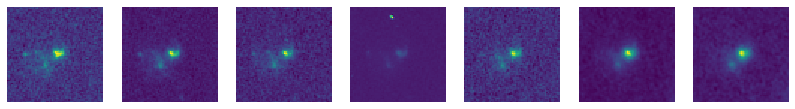

In [13]:
hf = h5py.File('Sample_train.hdf5', 'r')
hf.keys()

boz=np.random.randint(1,100)
mm = hf['train_img'][boz, ...]
plt.figure(figsize=(14,3))
for i in range(7):
    plt.subplot(1,7,i+1)
    plt.imshow(mm[i,:,:],origin='lower')
    plt.axis('off')
hf.close()

In [ ]:
gs = pyfits.getdata('/Users/shemmati/Dropbox/WFIRST_WPS/CANDELS_fits/gds.fits')
sel = (gs['zbest']>0.01)&(gs['zbest']<4.0)&(gs['CLASS_STAR']<0.9)&(gs['Hmag']<25.)&(gs['ISOAREA_IMAGE_F160W']>=40)&(gs['DECdeg']>-27.87)

sample_size = len(gs[sel])
image_size = 64
cut_size = 32
ra1,dec1,red1 = gs['RA_1'][sel],gs['DEC_1'][sel],gs['zbest'][sel]
mass1,sfr1 = gs['M_neb_med_lin'][sel], gs['SFR_13a_tau'][sel]
urest1,vrest1,jrest1 = gs['restUXbessel'][sel],gs['restVbessel'][sel],gs['restJpalomar'][sel]

# furthur cut on brightest galaxy being at the center of the cutout
redshift,ra,dec,mass,sfr,urest,vrest,jrest = [],[],[],[],[],[],[],[]
for i in range(sample_size):
    dat = cut(ra1[i],dec1[i],cut_size,imdir+'goodss_all_acs_wfc_f850l_060mas_v1.5_drz.fits')
    if (brightest_center(dat)):
        redshift.append(red1[i])
        ra.append(ra1[i])
        dec.append(dec1[i])
        mass.append(mass1[i])
        sfr.append(sfr1[i])
        urest.append(urest1[i])
        vrest.append(vrest1[i])
        jrest.append(jrest1[i])

sample_size = len(redshift)
print (sample_size)

In [ ]:
gs = pyfits.getdata('/Users/shemmati/Dropbox/WFIRST_WPS/CANDELS_fits/gds.fits')
sel = (gs['zbest']>0.01)&(gs['zbest']<2.0)&(gs['CLASS_STAR']<0.9)&(gs['Hmag']<25.)&(gs['ISOAREA_IMAGE_F160W']>=25)&(gs['DECdeg']<-27.87)

sample_size = len(gs[sel])
image_size = 64
cut_size = 32
ra1,dec1,red1 = gs['RA_1'][sel],gs['DEC_1'][sel],gs['zbest'][sel]
mass1,sfr1 = gs['M_neb_med_lin'][sel], gs['SFR_13a_tau'][sel]
urest1,vrest1,jrest1 = gs['restUXbessel'][sel],gs['restVbessel'][sel],gs['restJpalomar'][sel]

# furthur cut on brightest galaxy being at the center of the cutout
redshift,ra,dec,mass,sfr,urest,vrest,jrest = [],[],[],[],[],[],[],[]
for i in range(sample_size):
    dat = cut(ra1[i],dec1[i],cut_size,imdir+'goodss_all_acs_wfc_f850l_060mas_v1.5_drz.fits')
    if (brightest_center(dat)):
        redshift.append(red1[i])
        ra.append(ra1[i])
        dec.append(dec1[i])
        mass.append(mass1[i])
        sfr.append(sfr1[i])
        urest.append(urest1[i])
        vrest.append(vrest1[i])
        jrest.append(jrest1[i])

sample_size = len(redshift)
print (sample_size)

In [ ]:
#%rm 'Sample.hdf5'
import torchvision.transforms as transforms
tfms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

train_shape = (sample_size, 7, 64, 64)

hdf5_file = h5py.File('Sample_test.hdf5', mode='w')

hdf5_file.create_dataset("test_img", train_shape, np.float32)
hdf5_file.create_dataset("test_labels", (sample_size,), np.float32)
hdf5_file["test_labels"][...] = redshift

for i in range(sample_size):
    # print how many images are saved every 1000 images
    if i % 500 == 0 and i > 1:
        print ('Test data: {}/{}'.format(i, len(gs[sel])))

        
    data = np.zeros((7,64,64))
    pashe = np.zeros((7,64,64))
    
    data[0,:,:] = cut(ra1[i],dec1[i],32,'/Users/shemmati/Desktop/GOODS/goodss_all_acs_wfc_f435w_060mas_v1.5_drz.fits')
    data[1,:,:] = cut(ra1[i],dec1[i],32,'/Users/shemmati/Desktop/GOODS/goodss_all_acs_wfc_f606w_060mas_v1.5_drz.fits')
    data[2,:,:] = cut(ra1[i],dec1[i],32,'/Users/shemmati/Desktop/GOODS/goodss_all_acs_wfc_f775w_060mas_v1.5_drz.fits')
    data[3,:,:] = cut(ra1[i],dec1[i],32,'/Users/shemmati/Desktop/GOODS/goodss_all_acs_wfc_f814w_060mas_v1.5_drz.fits')
    data[4,:,:] = cut(ra1[i],dec1[i],32,'/Users/shemmati/Desktop/GOODS/goodss_all_acs_wfc_f850l_060mas_v1.5_drz.fits')
    data[5,:,:] = cut(ra1[i],dec1[i],32,'/Users/shemmati/Desktop/GOODS/goodss_all_wfc3_ir_f125w_060mas_v1.0_drz.fits')
    data[6,:,:] = cut(ra1[i],dec1[i],32,'/Users/shemmati/Desktop/GOODS/goodss_all_wfc3_ir_f160w_060mas_v1.0_drz.fits')

    for chi in range(7):
        s = ndimage.rotate(data[chi,:,:],0,mode='nearest',reshape=False)
        da = np.arcsinh(s)
        pash = (255.0 / (da.max()+0.1) * (da - da.min())).astype(np.uint8)
        pashe[chi,:,:] = tfms(pash)

    # save the image and calculate the mean so far
    hdf5_file["test_img"][i, ...] = pashe

hdf5_file.close()

In [ ]:
import torch
from galaxy_hdf5loader import galaxydata

dataset = galaxydata('Sample_train.hdf5')
assert dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1,shuffle=True, num_workers=int(0))

inputs, classes = next(iter(dataloader))  
real_cpu = inputs.to('cpu')
ajab = real_cpu.detach()
ajab = ajab.cpu()

In [ ]:
plt.figure(figsize=(14,3))
for i in range(7):
    plt.subplot(1,7,i+1) 
    plt.imshow(ajab[0,i,:,:],origin='lower')
    plt.axis('off')
